1.Зчитати архів  Customer Shopping Trends Dataset  за посиланням

Далі працюємо з файлом shopping_trends.csv

Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип стовпців.  

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Завантаження файла
df = pd.read_csv('/content/sample_data/shopping_trends.csv')

# Виведення розміру таблиці
print("Розмір таблиці:", df.shape)

# Перевірка наявності пропусків
print("Пропуски:")
print(df.isnull().sum())

# Типи стовпців
print("Типи стовпців:")
print(df.dtypes)

Розмір таблиці: (3900, 19)
Пропуски:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Revie

Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases".  

Застосуйте алгоритм K-means для кластеризації даних:
Для цього потрібно виконати:

I.Підготовка даних:
- Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).
- Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [31]:
selected_columns = df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
selected_columns.columns = ["age", "purchase_amount_usd", "review_rating", "previous_purchases"]

# Ініціалізація та використання K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(selected_columns)
selected_columns["cluster_labels"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-7201fffc3e33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["cluster_labels"] = kmeans.labels_


II. Визначення кількості кластерів.

1. Використайте метод ліктя, щоб визначити оптимальну кількість кластерів. Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів. Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

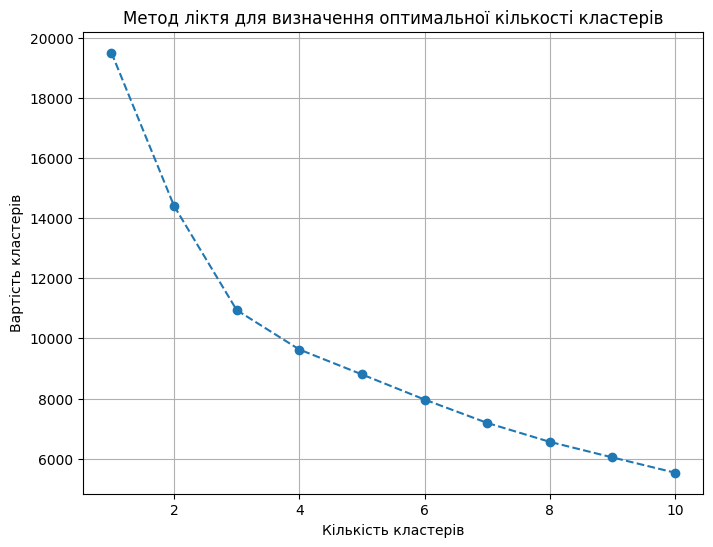

In [32]:
# Масштабування даних з використанням StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

costs = []

for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    costs.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), costs, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.grid()
plt.show()

2. Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

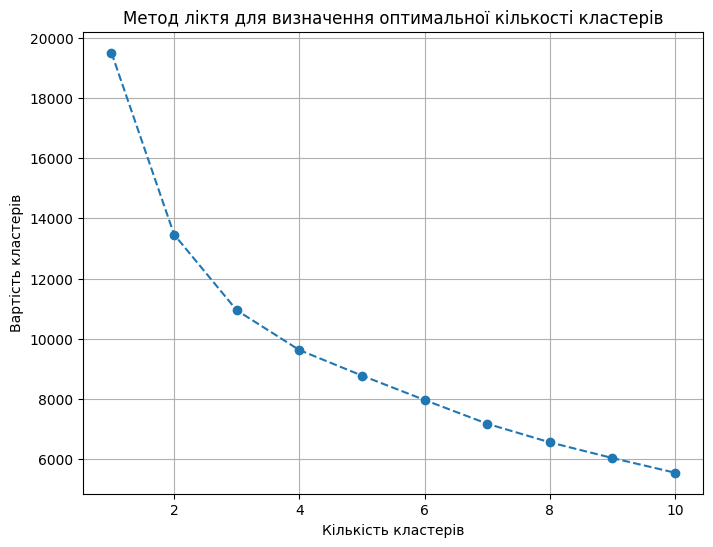

In [29]:
costs = []

for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    costs.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), costs, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.grid()

# Знаходження "ліктьової точки" (оптимальної кількості кластерів) за графіком
plt.show()

3. Кластеризація за допомогою K-means:

Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.

Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.

In [33]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_data)

# Призначення ідентифікаторів кластерів кожному об'єкту
df["cluster_labels"] = kmeans.labels_

print("Результати кластеризації:")
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Результати кластеризації:
      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                  

III. Візуалізація результатів:

Якщо ви хочете візуалізувати дані, які мають більше двох ознак, ви можете використовувати метод головних компонентів (PCA) для зменшення розмірності даних і подальшої візуалізації. PCA допоможе вам зменшити кількість ознак до 2 або 3, щоб побудувати графіки.

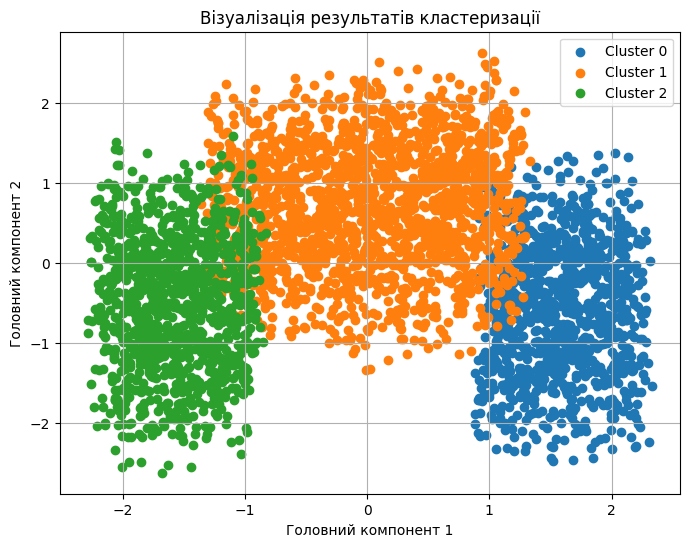

In [34]:
# Зменшення розмірності даних до 2 головних компонент
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Побудова графіку з відображенням кластерів
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = reduced_data[df["cluster_labels"] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.title('Візуалізація результатів кластеризації')
plt.legend()
plt.grid()
plt.show()


Висновок: У першій частині практичної роботи 7 я засвоїла на практиці кластеризацію даних за допомогою алгоритму K-means. Серед них: підготовка даних, визначення оптимальної кількості кластерів, застосування K-means, візуалізація результатів.